In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# # import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/writhemap.py:16: UserWarning: Cython version of writhemap (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/eval_link.py:10: UserWarning: Cython version of linkingnumber (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(


In [11]:
dna = mdna.make(control_points=mdna.Shapes.circle(1),n_bp=120,dLk=8,closed=True)
print(dna.get_linking_number())
dna.minimize(equilibrate_writhe=True)
print(dna.get_linking_number())

Random sequence: CGAAAGAACGTAAAATACTGTCGGCTTCTGTAGGGAGCCATGGGACCATGAATCATCACGTCCTCGCGTGACATCGAACGAAGCCCATATTCAGTACTTCGGGACTTGATTTGGTCGCTG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 120

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: 8
	Current twist number: 12.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 60.00 degrees

using numba
[20.  0. 20.]
Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = True 
excluded volume radius = 2.0 
temperature = 300
####################################
Initiating Excluded Volume...
EV_bead mismatch: including additional boundary checks.

##############################

In [15]:
view = nv.show_mdtraj(dna.get_MC_traj()[::50])
view

NGLWidget(max_frame=96)

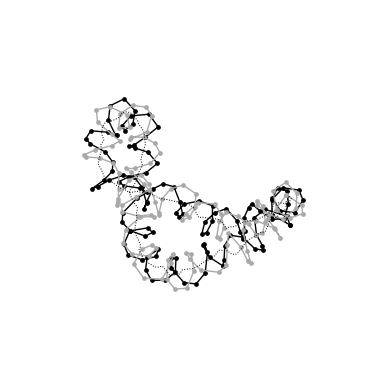

In [13]:
dna.draw()

In [ ]:
from pmcpy import pylk
positions = build.out['positions']
# writhes = [pylk.writhe(pos,closed=False) for pos in positions[::50]]
# plt.plot(writhes)
pylk.writhe(positions,closed=True)
triads = build.out['triads']
lk = pylk.triads2link(positions,triads)
lk

In [ ]:
from pmcpy import pylk

confs = build.out['confs']
confs.shape
positions = confs[:,:,:3,3]
triads = confs[:,:,:3,:3]
positions.shape, triads.shape

lk = pylk.triads2link(positions[-1],triads[-1])

writhe = pylk.writhe(positions[-1],closed=True)
print(lk,writhe,lk-writhe)

writhes = [pylk.writhe(pos,closed=False) for pos in positions[::50]]
plt.plot(writhes)
    

#### add connect


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5

Random sequence: TGAATA 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0.0 
temperature = 300


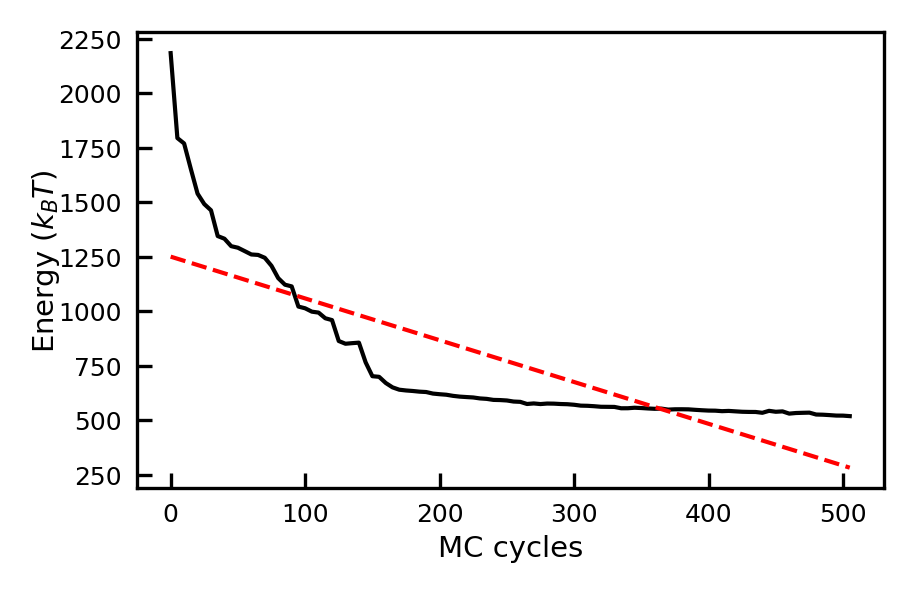

NGLWidget(max_frame=10)

In [33]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))

dna2 = mdna.connect(dna0,dna1,n_bp=5)
#dna2.minimize(exvol_rad=2)

view = nv.show_mdtraj(dna2.get_MC_traj()[::50])
view


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5

Random sequence: ATTGCCCGCAAC 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0.0 
temperature = 300


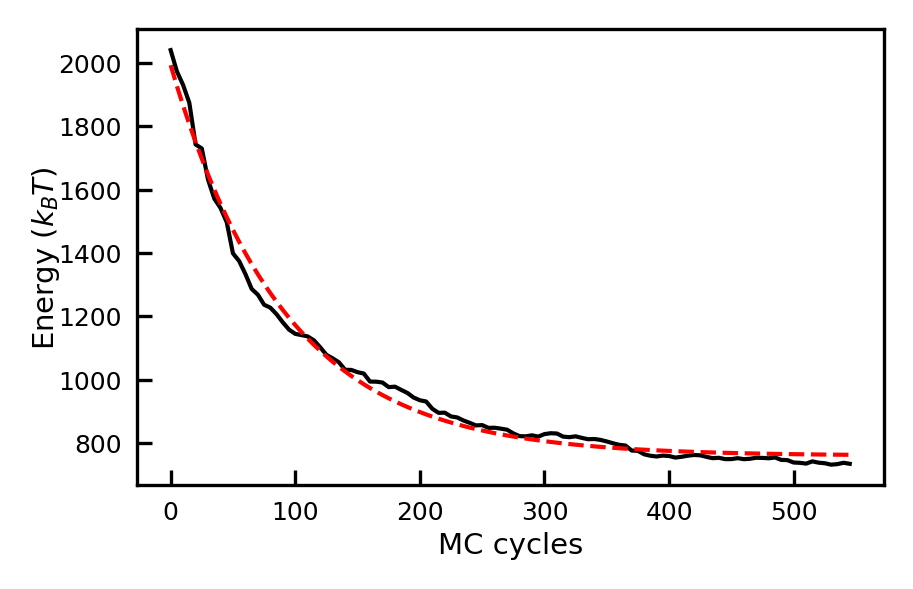

NGLWidget(max_frame=10)

In [32]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([20,20,0]))

dna2 = mdna.connect(dna0,dna1,n_bp=10)#sequence='AAAAAGGGGG')
#dna2.minimize(exvol_rad=0.5)
view = nv.show_mdtraj(dna2.get_MC_traj()[::50])
view

#### add extend  


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5



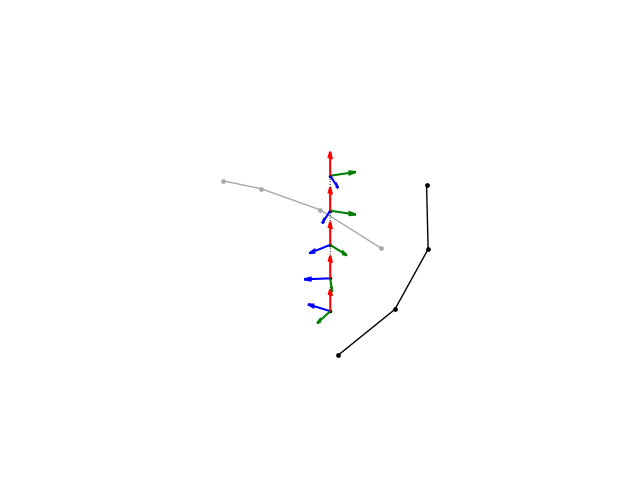

In [11]:
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))
dna1.draw(triads=True)

In [27]:
dna =  mdna.make(sequence='AAAAAAA')
print(dna.describe())
# dna.extend(24,forward=True,minimize=False)
# print(dna.describe())
# dna.extend(24,forward=False,minimize=False)
# print(dna.sequence)
# #, dna.sequence, dna.describe()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 7

DNA structure with 7 base pairs
Sequence: AAAAAAA
Trajectory not loaded
Frames:  (7, 1, 4, 3)
None


In [24]:
print(dna.describe())

DNA structure with 55 base pairs
Sequence: GCATAAATGAAGTTTTACATACTGAAAAAAAAGGCGTCGCTGTCAGAGACTTACA
Trajectory: <mdtraj.Trajectory with 1 frames, 2249 atoms, 110 residues, without unitcells>
Frames:  (55, 1, 4, 3)
None


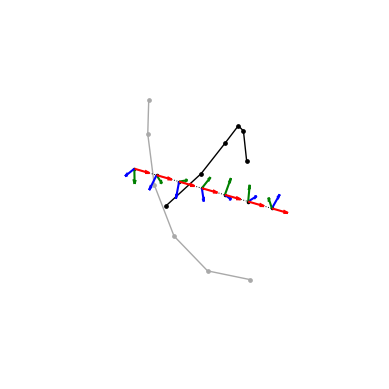

In [34]:
dna.draw(triads=True)

Random sequence: CTGAGACACTCGCCCGCGCTTCAG 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 9
   bp per EV bead:     7
   Effective size:     3.642
   Exclusion distance: 4.0
######################################


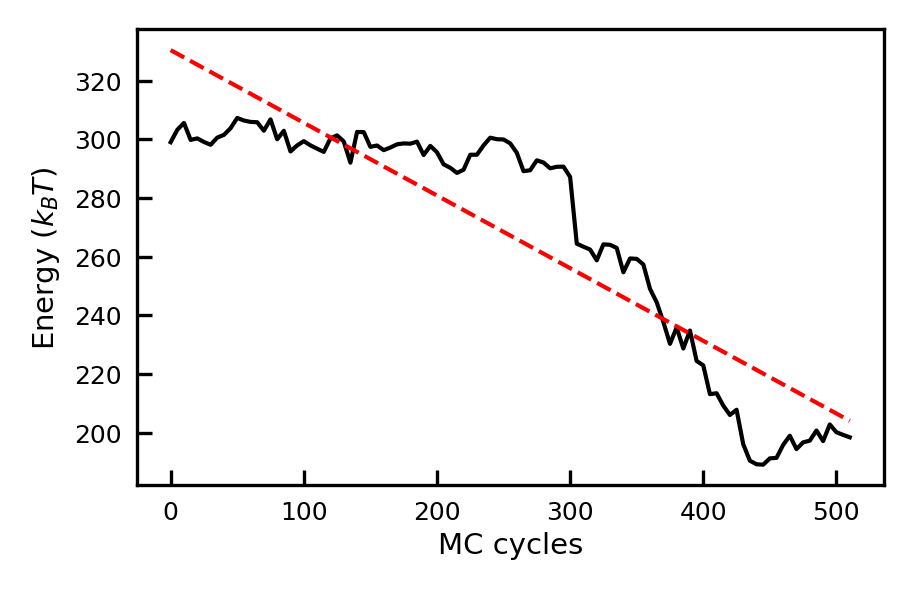

57

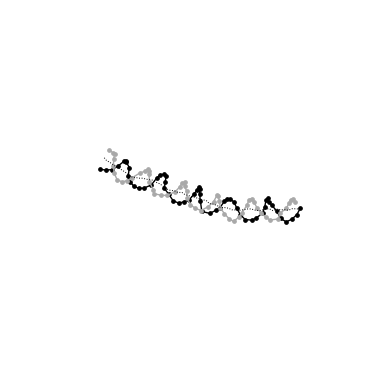

In [6]:
new_dna.extend(24,forward=True)
newest_dna = new_dna.new_nuc
newest_dna.draw()   
newest_dna.n_bp

#### fix mutations

In [2]:
dna =  mdna.make(sequence='GCATATAGC')
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    print(idx, [at.name for at in res._atoms])
    idx+=1


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9

GCATATAGC
0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
0 ["O5'", "C5'", "C4'", "O4'", "C3'", "O3'", "C2'", "C1'", 'N9', 'C8', 'N7', 'C5', 'C6', 'O6', 'N1', 'C2', 'N2', 'N3', 'C4']
1 [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
1 ['P', 'OP1', 'OP2', "O5'", "C5'", "C4'", "O4'", "C3'", "O3'", "C2'", "C1'", 'N1', 'C2', 'O2', 'N3', 'C4', 'N4', 'C5', 'C6']
2 [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
2 ['P', 'OP1', 'OP2', "O5'", "C5'", "C4'", "O4'", "C3'", "O3'", "C2'", "C1'", 'N9', 'C8', 'N7', 'C5', 'C6', 'N6', 'N1', 'C2', 'N3', 'C4']
3 [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
3 ['P', 'OP1', 'OP2', "O5'", "C5'", "C4'", "O4'", "C3'", "O3'", 

In [57]:
dna =  mdna.make(sequence='TCATATAGC')
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [(at.index, at.name) for at in res._atoms])
    #print(idx, [at.name for at in res._atoms])
    if idx == 1:
        break
    idx+=1


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9

TCATATAGC
0 [(0, "O5'"), (1, "C5'"), (2, "C4'"), (3, "O4'"), (4, "C3'"), (5, "O3'"), (6, "C2'"), (7, "C1'"), (8, 'N1'), (9, 'C2'), (10, 'O2'), (11, 'N3'), (12, 'C4'), (13, 'O4'), (14, 'C5'), (15, 'C7'), (16, 'C6')]
1 [(17, 'P'), (18, 'OP1'), (19, 'OP2'), (20, "O5'"), (21, "C5'"), (22, "C4'"), (23, "O4'"), (24, "C3'"), (25, "O3'"), (26, "C2'"), (27, "C1'"), (28, 'N1'), (29, 'C2'), (30, 'O2'), (31, 'N3'), (32, 'C4'), (33, 'N4'), (34, 'C5'), (35, 'C6')]


In [84]:
dna =  mdna.make(sequence='ATGCUDETLMBSZP')
traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('ball+stick')
view


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 14



NGLWidget()

In [76]:
dna =  mdna.make(sequence='GCC')
print(dna.sequence)
dna.mutate(mutations={2: 'P'},complementary=False)#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [(at.index, at.name) for at in res._atoms])
    #print(idx, [at.name for at in res._atoms])
    if idx == 1:
        break
    idx+=1


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 3

GCC
resid 2 P
n_mutant 11
n_target 8
diff 3
empty [DC3-P, DC3-OP1, DC3-OP2, DC3-O5', DC3-C5', DC3-C4', DC3-O4', DC3-C3', DC3-O3', DC3-C2', DC3-C1']
empty [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
target 49 IGU7-N9
idx, offset+idx, insert_id+idx
1 49 11
ins 49 [DC3-P, DC3-OP1, DC3-OP2, DC3-O5', DC3-C5', DC3-C4', DC3-O4', DC3-C3', DC3-O3', DC3-C2', DC3-C1', DC3-N9]
ins 49 [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
target 50 IGU7-C8
idx, offset+idx, insert_id+idx
2 50 12
ins 50 [DC3-P, DC3-OP1, DC3-OP2, DC3-O5', DC3-C5', DC3-C4', DC3-O4', DC3-C3', DC3-O3', DC3-C2', DC3-C1', DC3-N9, DC3-C8]
ins 50 [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
target 51 IGU7-N7
idx, offset+idx, insert_id+idx
3 51 13
ins 51 [DC3-P, DC3-OP1, DC3-OP2, DC3-O5', DC3-C5', DC3-C4', D

In [79]:
traj = dna.get_traj()

view = nv.show_mdtraj(traj) 
view.clear()
view.add_representation('licorice')
view

NGLWidget()

In [2]:
dna =  mdna.make(sequence='CGCGATATAGC')
print(dna.sequence)
dna.methylate(CpG=True)#=={0: 'A'})#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    idx+=1


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 11

CGCGATATAGC
Methylate all C in CpG context, superseeds methylations list.
Methtylating: [0, 2]
CGCGATATAGC
0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
1 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
2 [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 57]
3 [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
4 [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
5 [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
6 [122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
7 [143, 144, 145, 146, 147, 148, 149, 150, 151,

In [17]:
dna =  mdna.make(sequence='GAG')
print(dna.sequence)
dna.flip(fliplist=[1],deg=180)#=={0: 'A'})#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    idx+=1


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 3

GAG
Flipped residues [1] by 3.141592653589793 radians
GAG
0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
1 [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
2 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
3 [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
4 [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]
5 [98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]


In [19]:
dna =  mdna.make(sequence='GAG')
view = nv.show_mdtraj(dna.get_traj())
view.clear()
view.add_representation('licorice')
view


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 3



NGLWidget()

In [18]:
dna = mdna.make(n_bp=120,control_points=mdna.Shapes.circle(1),closed=True,dLk=5)
dna.minimize(equilibrate_writhe=True)

Random sequence: GTATCTTAGCGGAATTTGTATATTCTCATGACCCAAAACAATCTGGCCGTTGCGTTCTTAGAGCTCGCATAAAGTGCATGTTACCCGACAGACATACCAAGCCGCCGTTCTGCTCGTGAA 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 120

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: 5
	Current twist number: 12.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 51.00 degrees

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = True 
excluded volume radius = 2.0 
temperature = 300
####################################
Initiating Excluded Volume...
EV_bead mismatch: including additional boundary checks.

######################################
#### INITIALIZING

In [13]:
dna = mdna.make(n_bp=300,control_points=mdna.Shapes.trefoil(1),closed=True,dLk=12)
dna.minimize(equilibrate_writhe=True)

Random sequence: GGGTTTGAAGCCGTGCGCCTGATAGAGTCCAAAACTGAGTTAACACGAGTCGGGCCCAAGCCCAGTGTCCGCCCCTTCCGGTAGGGTGTTTACTTCGATGCACTCCAGTGGCGGCTAGCCAGGACTGACGGCGGGGCGCTTCGGAACTTTTCACCGTACGTAAAGCGTCGTGGTGTTGGGATACCGGGGGGAAGAATTAGTATGTCCCCTCGGCGCCTACGGTCGGGTGGTACGTCCCTGCGAGGTGATTATTGCATCGGTGGCGGAACGGTCCTCTAGGTACTGGTTCGGTTAGTAAGA 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 300

Structure is requested to be circular:
	Excess twist per base to make ends meet: 0.51 degrees
	New twist angle per base pair: 34.8 

Adjusting twist angles to match the given Delta linking number: 12
	Current twist number: 29.00
	Old twist angle per base pair: 34.80 degrees
	Adjusted twist angle per base pair: 49.20 degrees

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = True 
excluded volume radius = 2.0 
temperature = 300

In [19]:
mc = dna.get_MC_traj()
view = nv.show_mdtraj(mc[::50])
view.clear()
view.add_representation('line', selection='all')
view

NGLWidget(max_frame=96)

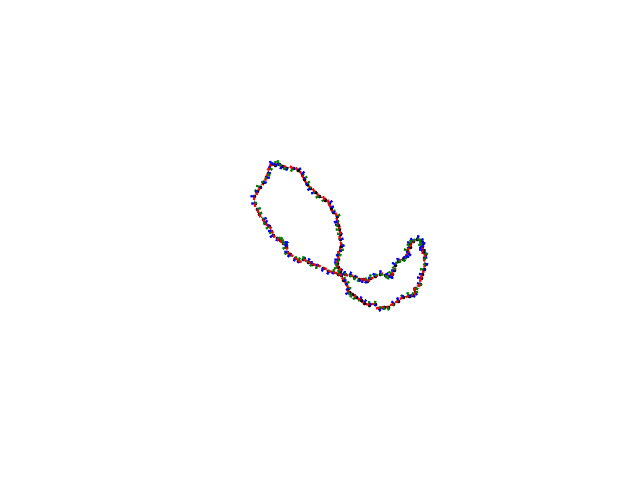

In [21]:
dna.draw(triads=True,backbone=False)

Random sequence: TCGGTAGAAAGTGAACTCATTCGCGTCATATCTTTGCTTTGCTAGGGTTTAAAGGCTACTACGCATGCCAAAGAAAGGTAAGTTCGAGCTTTGCCGTATC 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100



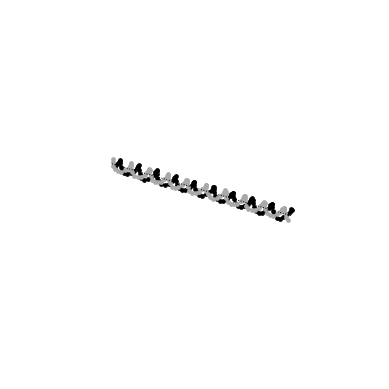

In [27]:
dna = mdna.make(n_bp=100)
dna.draw()

Random sequence: TCTACGCGACAAGTATTTGTTTCAGTTCGTGGTAAGATTCAACGTCATATTATGTTATTGATGGCGGACTCTGATCAGCAGACTTACGGTGTGTGAATATCCACCGTATCTCTTTCGGACGAGACCAGTTTGCACTAGGGAATAATAATCTATAAACAGAAACTGGCCACAGTCCGAATTTCCCAATAACCCACCTTCCATGGAGATAGCTAGCCTCTGAGATACGACGGGTTTGGACTCGAAGACCATTCGGTGTGCACTTTCTAGATGGATCGAGAAAAGAGTCCAGTGCCCCCTTGGTTTCGGACACTTGGG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 315

Structure is requested to be circular:
	Excess twist per base to make ends meet: 0.00 degrees
	New twist angle per base pair: 34.29 

Adjusting twist angles to match the given Delta linking number: 5
	Current twist number: 30.00
	Old twist angle per base pair: 34.29 degrees
	Adjusted twist angle per base pair: 40.00 degrees

Circular DNA structure with 315 base pairs
Sequence: TCTACGCGACAAGTATTTGTTTCAGTTCGTGGTAAGATTCAACGTCATATTATGTTATTGATGG

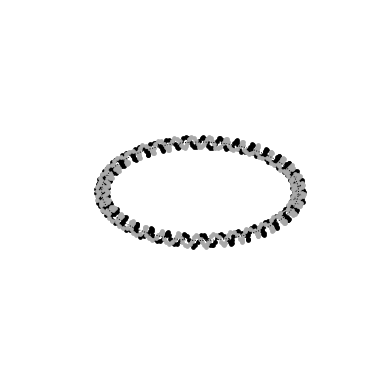

In [15]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.describe()
nuc.draw()
nuc.minimize(equilibrate_writhe=True,simple=True,exvol_rad=2, temperature=300)
traj = nuc.get_traj()
traj.save('315nuc.pdb')

Random sequence: GACTGTAGGCAGTCGCAGGGCCAGAATCGACTCACTTTGCACCAGATAAGGTTATTCCGATCTCCCTCATTCGCCAGCTTATATACGTGAGCCGACTTACACTTGGACAGTAGGATGAGCGACTACCCCTGTGTACGCTATCAGTACCAACACTCGTCGCGTGCCTCCTAAGTCAGGCTCCAAAGATCTCCTTAGGTGCTGACGAACCACAAGGGCGCACCCGCAAGACCGACGCTACGCGATACGCGGCACTACGCCCCTGTAACTGCTAGAGGGCGGCAACAAGAACGCACGGCCCCTTATCCCGCTGAAGCC 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 315

Structure is requested to be circular:
	Excess twist per base to make ends meet: 0.00 degrees
	New twist angle per base pair: 34.29 

Adjusting twist angles to match the given Delta linking number: 5
	Current twist number: 30.00
	Old twist angle per base pair: 34.29 degrees
	Adjusted twist angle per base pair: 40.00 degrees

Circular DNA structure with 315 base pairs
Sequence: GACTGTAGGCAGTCGCAGGGCCAGAATCGACTCACTTTGCACCAGATAAGGTTATTCCGATCTC

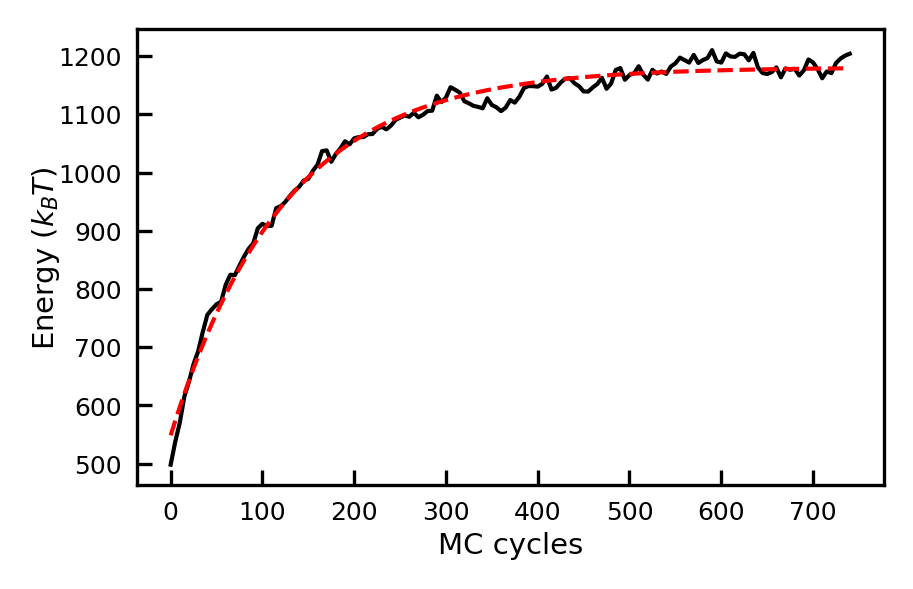

In [13]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.describe()
nuc.minimize(equilibrate_writhe=False,simple=False,exvol_rad=2, temperature=300)
traj = nuc.get_traj()
traj.save('315nuc_expmin.pdb')

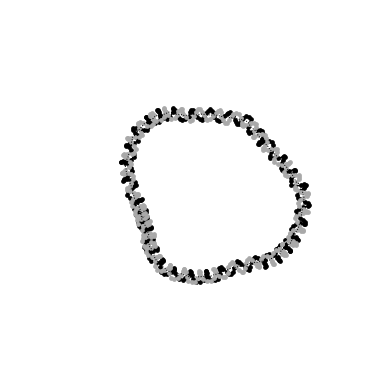

In [14]:
nuc.draw()

In [11]:
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('line')
view

NGLWidget()

In [12]:
traj.save('circle_315bp_dlk5.pdb')

In [5]:
pdb = mdna.sequence_to_pdb('CAT')


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 3



In [6]:
traj = mdna.sequence_to_md('CAT')


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 3

Initialize DNA openMM simulation at 310 K for 100 ps time units
Minimize energy
Run simulation for 50000 steps
Simulation completed
Saved trajectory as: ./CAT.h5


(500, 3)

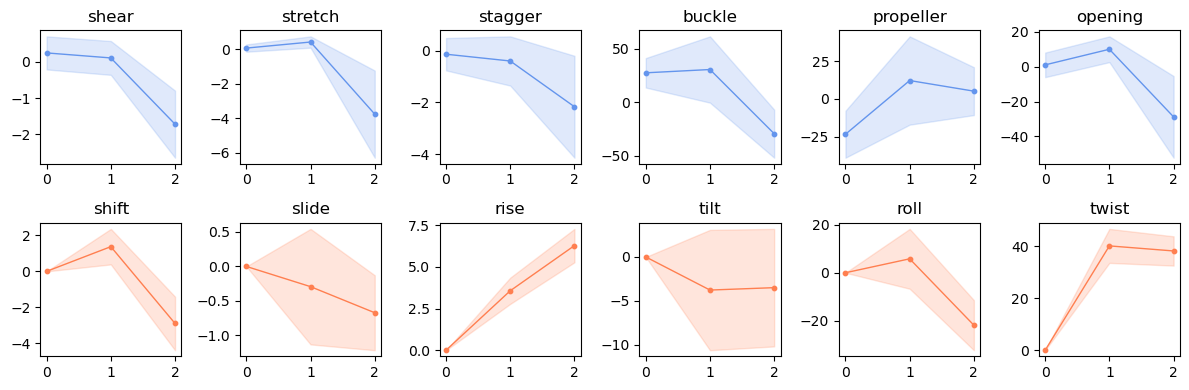

In [8]:
nuc = mdna.compute_rigid_parameters(traj)
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

In [9]:
path  = '/Users/thor/surfdrive/Data/h-ns/BacterialChromatin/FI_simulations/0_k/8_Haff/' #0_3GC'
i =0
traj = md.load(path+f'dry_{i}_run.xtc', top=path+f'dry_{i}_run.pdb',stride=10).remove_solvent()
traj = traj.atom_slice(traj.top.select('not protein'))
traj = traj.superpose(traj,0)
traj
nuc = mdna.compute_rigid_parameters(traj)


(2001, 12)

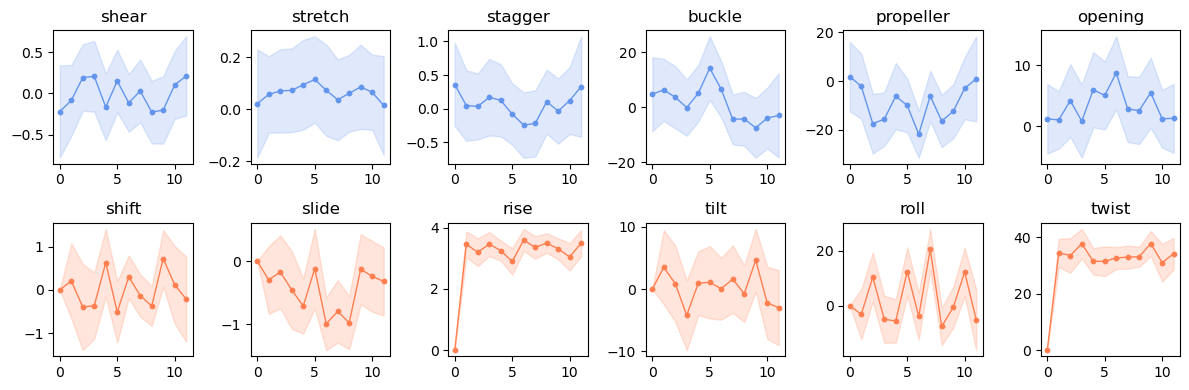

In [10]:
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

#### Test with mdtraj 

In [ ]:
mdna.make(sequence, control_points, nbp, closed)

DNA structure with 12 base pairs
Sequence: GCAATATATTGC
Trajectory: <mdtraj.Trajectory with 2001 frames, 762 atoms, 24 residues, and unitcells>
Frames:  (12, 2001, 4, 3)


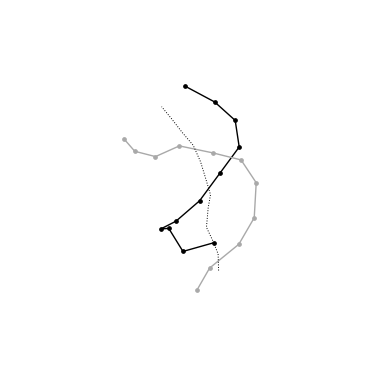

In [31]:
nuc = mdna.load(traj)
nuc.describe()
nuc.draw()#triads=False,lw=5, helical_axis=True,markersize=10)

Random sequence: GTTTGCTGTGGTTATTGGTCTGTCGGAAATCTAAGGTTCAATGGCGTGACTTCTCGGACTGGACTTTTGAAGGATCGGGGCTACTTTGCTAGGTCCCCGT 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -5
	Current twist number: 10.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 18.00 degrees



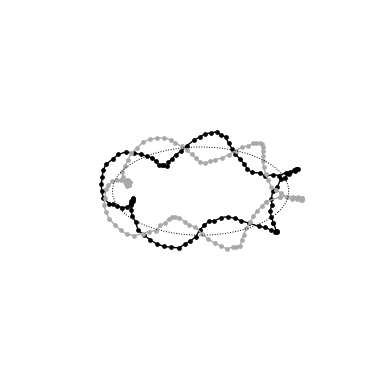

In [4]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape, n_bp=100, closed=True, dLk=5)
nuc.draw()

In [6]:
nuc.frames.shape

(100, 1, 4, 3)

Random sequence: AGGAGAGTTCGAGCTCCACGAGGTGATAGTTGATCACGAATTCTTGCATCACCCCAACGCCCATACGCCACCGACTTCACTGTAACAACTCTTCAATTGCAGTGTGCGCGGGGCAGCTCTGTATGTGGTACCACCACTCCAAAATGTCCAAGTGCCATTGTCCTCAATCGACTCCATCGGGCTCTTTGGCCACCATATTCACAGAGGCCTAGAAGGACCTGTATGTATTTGCCACGCTACCTGTCCAACCCTGGCCACTTATAATTGTTTAGAATATCGATGGTGTCCCTAGCGCTCAGTATAAGCAAGGCGTAG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 315

Structure is requested to be circular:
	Excess twist per base to make ends meet: 0.00 degrees
	New twist angle per base pair: 34.29 

Adjusting twist angles to match the given Delta linking number: 5
	Current twist number: 30.00
	Old twist angle per base pair: 34.29 degrees
	Adjusted twist angle per base pair: 40.00 degrees



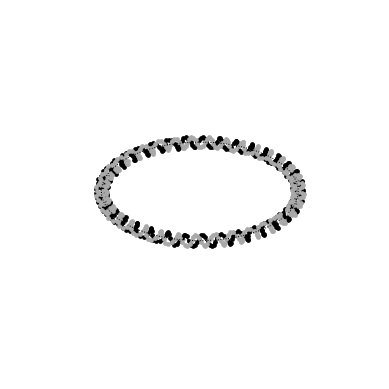

In [3]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.draw()
nuc.minimize(equilibrate_writhe=False,simple=False,exvol_rad=0.0, temp=300)
nuc.draw()

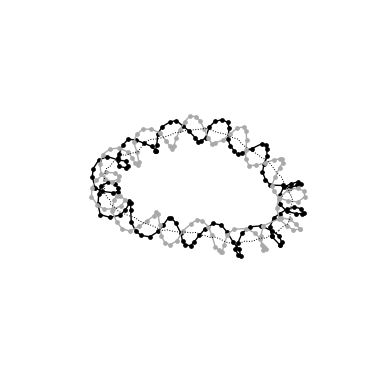

In [55]:
nuc.draw()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 60

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -4
	Current twist number: 6.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 12.00 degrees

Random sequence: ATCCAGCGCCTATGGACGCCCTATAGTATTGCGGCGGAGGTCTCTTAGACACTCTATCAG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 120

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angl

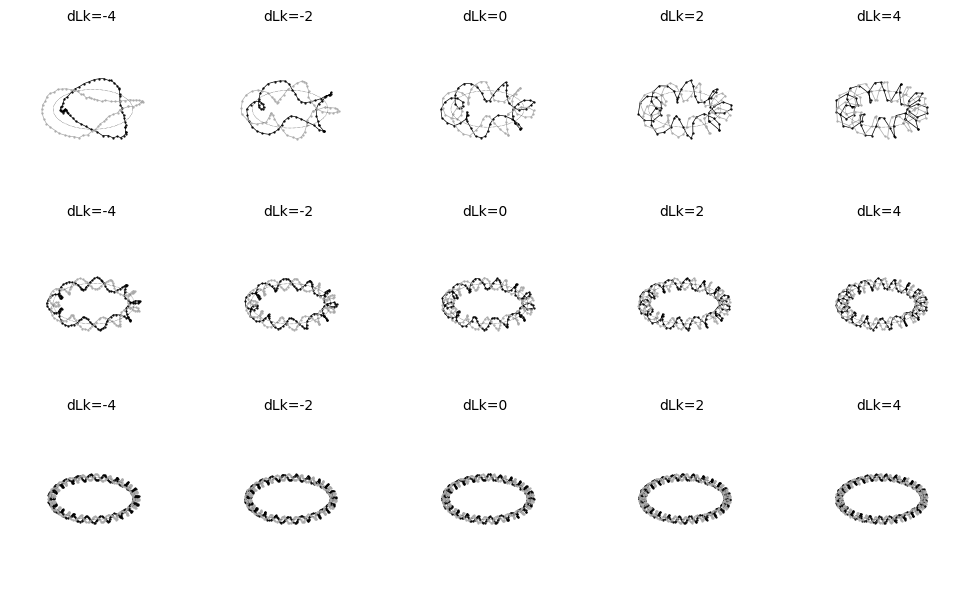

In [219]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots( len(size),len(lk), figsize=(len(lk)*n,len(size)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,l in enumerate(lk):
    for j,s in enumerate(size):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 60

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -4
	Current twist number: 6.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 12.00 degrees

Random sequence: ACCCCCCGCGGAAGTCGATGACAATGGTGAAGCATTACAAGCGCCGTAGCTTTAATCGTT 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 60

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angle

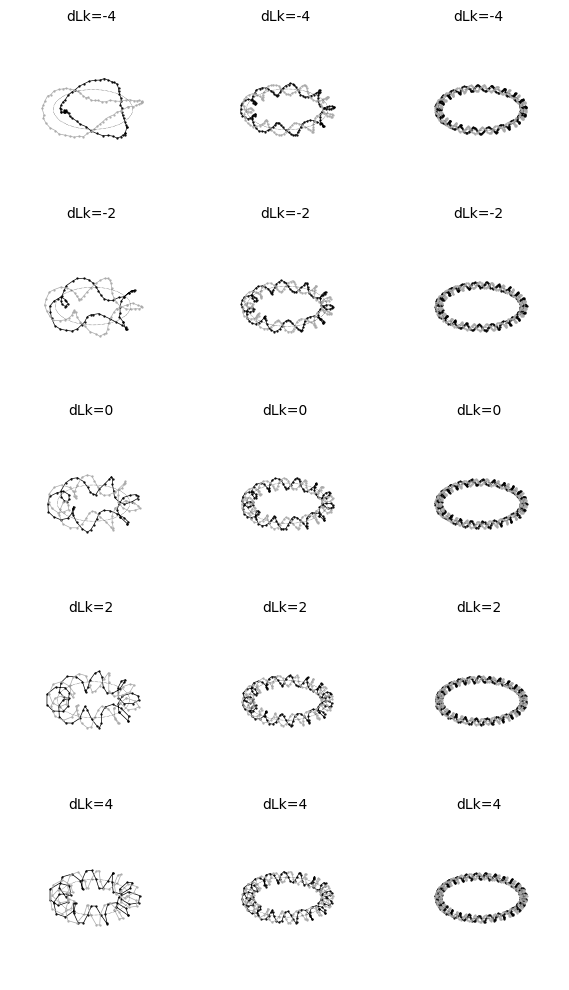

In [220]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots(len(lk),  len(size),figsize=(len(size)*n,len(lk)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,s in enumerate(size):
    for j,l in enumerate(lk):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()

In [180]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=100,dLk=0,closed=True)


nuc = mdna.load(frames=spline.frames)
nuc.describe()




Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -5
	Current twist number: 10.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 18.00 degrees

Random sequence: GGCCATTATGAGTATATGTCAGCGTACTAGTACGATGGTTTGGCTAGCCGACATACTCACCGGCTATTCCAGGGCCTGGCGCTCTGCGAACCTCTGACTA 

Circular DNA structure with 100 base pairs
Sequence: GGCCATTATGAGTATATGTCAGCGTACTAGTACGATGGTTTGGCTAGCCGACATACTCACCGGCTATTCCAGGGCCTGGCGCTCTGCGAACCTCTGACTA
Trajectory not loaded
Frames:  (100, 1, 4, 3)


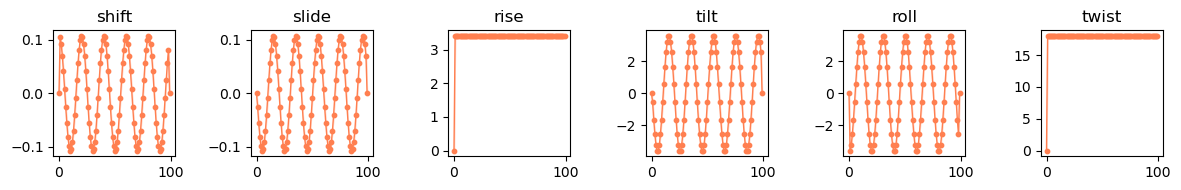

In [202]:
rigid = nuc.get_rigid_parameters()
fig, ax = rigid.plot_parameters(step=True,base=False)


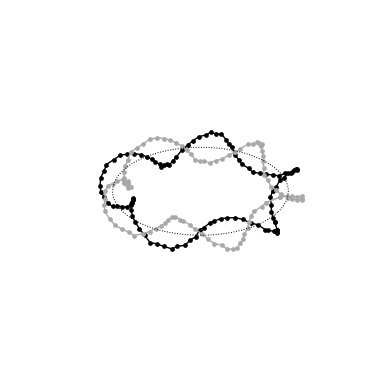

In [205]:
nuc.draw(triads=False,backbone=True)

<mdtraj.Trajectory with 1 frames, 4914 atoms, 240 residues, without unitcells>
(120, 4, 3)


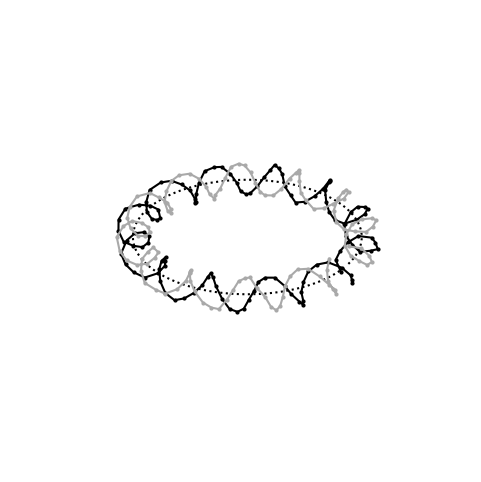

In [20]:
nuc.draw()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 120

Adjusting twist angles to match the given Delta linking number: -3
	Current twist number: 11.43
	Old twist angle per base pair: 34.29 degrees
	Adjusted twist angle per base pair: 25.29 degrees

Sequence: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Number of base pairs: 120
<mdtraj.Trajectory with 1 frames, 4914 atoms, 240 residues, without unitcells>
(120, 4, 3)


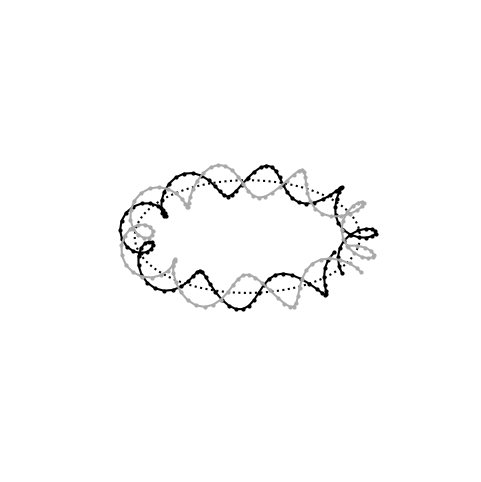

In [3]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=120,dLk=-3)
frames = spline.frames
nuc = mdna.load(frames=frames,sequence=''.join(['A']*len(frames)))
nuc.n_bp, nuc.sequence
nuc.draw()

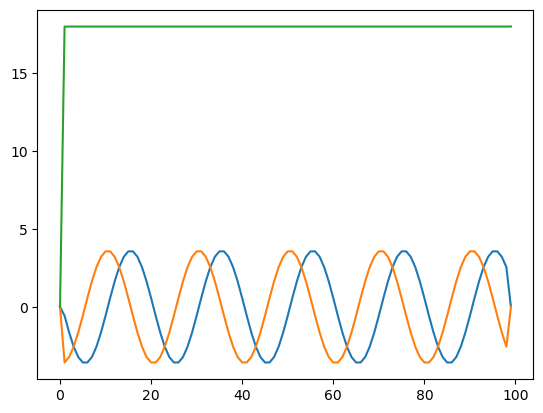

In [179]:
%matplotlib inline  
plt.plot(rigid.get_parameter('tilt')[0])  
plt.plot(rigid.get_parameter('roll')[0])
plt.plot(rigid.get_parameter('twist')[0])
plt.show()

(12, 2001, 4, 3)
(12, 3)


(1.7312086820602417,
 6.1697918176651,
 4.212208867073059,
 8.650792002677917,
 0.09106272459030151,
 3.4200000762939453)

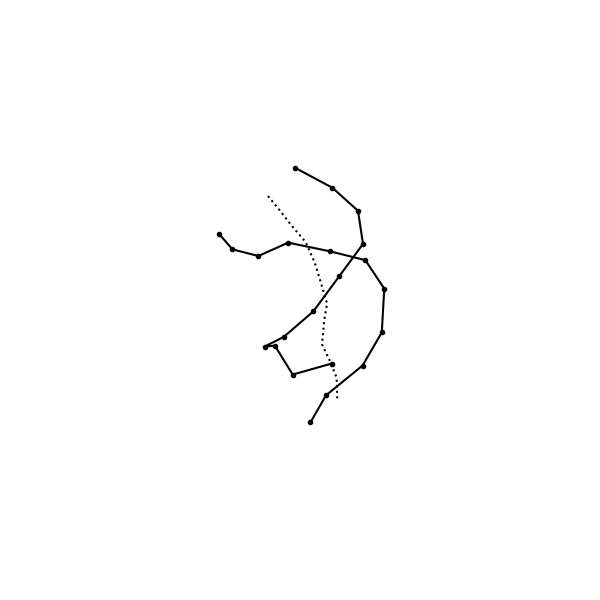

In [37]:
%matplotlib ipympl
phosphor_A  = traj.top.select('name P and chainid 0')
phosphor_B  = traj.top.select('name P and chainid 1')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

frames = nuc.mean_reference_frames
print(frames.shape)
helical_axis = frames[:,0,0]
print(helical_axis.shape)
ax.plot(helical_axis[:,0],helical_axis[:,1],helical_axis[:,2],':',c='k',markersize=5)

ax.plot(traj.xyz[0,phosphor_A,0],traj.xyz[0,phosphor_A,1],traj.xyz[0,phosphor_A,2],'-o',c='k',markersize=3)
ax.plot(traj.xyz[0,phosphor_B,0],traj.xyz[0,phosphor_B,1],traj.xyz[0,phosphor_B,2],'-o',c='k',markersize=3)
ax.axis('equal')
ax.axis('off')

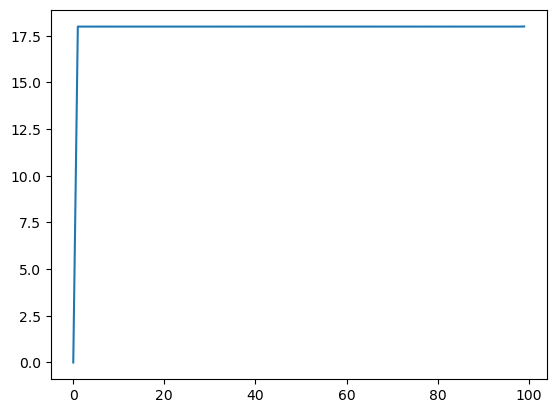